In [79]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

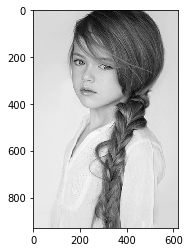

In [80]:
img = cv2.imread('pime.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# show source img
plt.imshow(gray, cmap='gray')

In [81]:
# Compact SVD
u, s, vt = np.linalg.svd(gray, full_matrices=False)

# diagolalization
w = np.diag(s)

print(u.shape)
print(w.shape)
print(vt.shape)

(930, 620)
(620, 620)
(620, 620)


In [82]:
out = np.dot(u, np.dot(w, vt))
print(out.shape)

(930, 620)


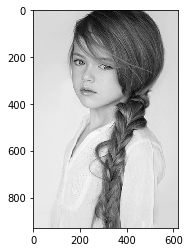

In [84]:
plt.imshow(out, cmap='gray')

In [85]:
from sklearn.utils.extmath import randomized_svd
# Truncated SVD
t_u, t_s, t_vt = randomized_svd(gray, n_components=10, n_iter=5, random_state=None)
t_w = np.diag(t_s)

print(t_u.shape)
print(t_w.shape)
print(t_vt.shape)

(930, 10)
(10, 10)
(10, 620)


In [86]:
t_out = np.dot(t_u, np.dot(t_w, t_vt))

(930, 620)


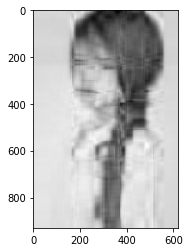

In [87]:
print(t_out.shape)
plt.imshow(t_out, cmap='gray')

In [88]:
cv2.imwrite('t_out.jpg', t_out)

True

In [89]:
!ls -al *.jpg

-rwxrw-rw- 1 pknam pknam 105098 Mar  6  2015 pime.jpg
-rw-rw-r-- 1 pknam pknam  64914 Mar 14 14:22 t_out.jpg
